In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
!pip install matplotlib -U # matplotlib update

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf 

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']

plt.rcParams['axes.unicode_minus'] = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
log = pd.read_csv('/content/drive/MyDrive/data/a1_factory /data/log_csv.csv',index_col = 0)
log

# ab test , 퍼널분석(AARRR)
# 1.  collect_time groupby uid의 수 - 하루동안 접속한 유저의 수 (daily active user)

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [5]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659541 entries, 0 to 5659540
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   uid              object 
 1   action_type      object 
 2   category1        object 
 3   category2        object 
 4   category3        object 
 5   collect_time     object 
 6   geoip_city_name  object 
 7   useragent_os     object 
 8   viewrate         float64
 9   viewtime         int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 475.0+ MB


In [6]:
log.collect_time = pd.to_datetime(log.collect_time)


In [7]:
log 

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [8]:
uid_count = log['uid']
len(uid_count)
uid_count

0          avpKyWMn/xEADNlb
1          0+5vEmGkOuAAB5j2
2          r8DXy2OtSl8AAojG
3          dC9Fl2Ly9lcADrTn
4          09gKcGLg0I8ACyQy
                 ...       
5659536    PUpxWWMWdcIACR2B
5659537    PVMstmNg4I4ADq9R
5659538    diRXdmN49dUABrVo
5659539    dusFzWJvp5cADhZW
5659540    bgy5ZGOszc4ADrmd
Name: uid, Length: 5659541, dtype: object

In [9]:
log_df = log.duplicated(subset = ['uid'])
print(log_df)

0          False
1          False
2          False
3          False
4          False
           ...  
5659536    False
5659537     True
5659538     True
5659539     True
5659540     True
Length: 5659541, dtype: bool


In [10]:
len(log[log_df==False]) #uid중복된 값 없애고 uid의수 :하루동안의 접속자 수

828537

In [11]:
log.shape

(5659541, 10)

In [12]:
log.describe()



,viewrate,viewtime
count,5.657112e+06,5.659541e+06
mean,7.677686e+01,5.126022e+04
std,4.221447e+01,5.810345e+05
min,0.000000e+00,0.000000e+00
25%,1.000000e+02,8.940000e+02
50%,1.000000e+02,1.010400e+04
75%,1.000000e+02,4.800500e+04
max,1.000000e+02,8.636989e+07


In [13]:
log.isnull().sum() #null값 확인


uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [14]:
log.dropna(inplace = True)
log.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4364999 entries, 0 to 5659540
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   uid              object        
 1   action_type      object        
 2   category1        object        
 3   category2        object        
 4   category3        object        
 5   collect_time     datetime64[ns]
 6   geoip_city_name  object        
 7   useragent_os     object        
 8   viewrate         float64       
 9   viewtime         int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 366.3+ MB


In [15]:
# category 1
len(log['category1'].unique()) 

2655

In [16]:
# category2 
len(log['category2'].unique())

548

In [17]:
# category3 
len(log['category3'].unique())


1683

In [18]:
Index = np.arange(1,4365000)

log.set_index(Index, inplace =True)

In [19]:
# pip install matplotlib==3.1.1


Text(0.5, 1.0, 'Num of UserAgent')

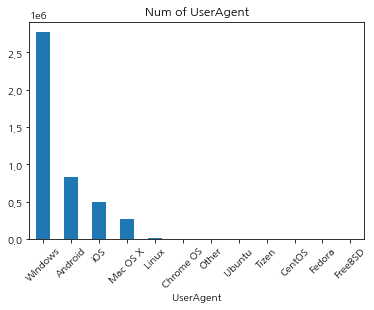

In [20]:
log.useragent_os.value_counts().plot(kind ='bar')
plt.xticks(rotation = 45)
plt.xlabel('UserAgent')
plt.title('Num of UserAgent')


(array([0.5, 1.5]), [Text(0.5, 0, 'viewrate'), Text(1.5, 0, 'viewtime')])

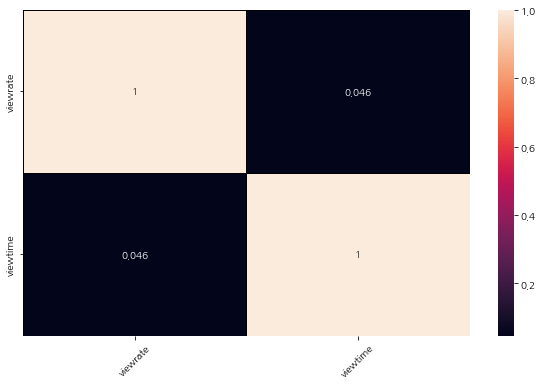

In [21]:
ax = plt.figure(figsize = (10,6))
corr = log.corr()
sns.heatmap(corr, linewidths = 1, linecolor = 'black', annot = True)
plt.xticks(rotation=45)

In [22]:
log.viewrate.value_counts()

100.00    3393077
0.00       952613
99.91        5744
99.90        2670
99.93        1729
           ...   
63.80           1
94.51           1
92.81           1
82.25           1
2.25            1
Name: viewrate, Length: 1646, dtype: int64

In [23]:
log[log['viewtime'] >= log['viewtime'].mean()] # 제일 많은 시간 머문 uid

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
1,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
9,fG9bBGOixrkAB+UC,View,유아·아동,유아동패브릭,턱받이·손수건,2022-12-29 16:20:47,Cheonan,Windows,100.0,89718
11,eaoY0WN8dj4AB9W6,View,데코·식물,홈갤러리,그림·사진,2022-12-29 15:44:56,Ansan-si,Windows,100.0,160273
13,PSC7BWJrY14ABLnw,View,패브릭,이불·이불솜,이불,2022-12-29 13:03:15,Seoul,Windows,100.0,229178
14,Ow81a2KCTO0ADJ9z,View,패브릭,러그·카페트,기타러그,2022-12-29 16:20:31,Yeongdeungpo-dong,Android,100.0,86006
...,...,...,...,...,...,...,...,...,...,...
4364953,d8l1m2OO/xcABvnh,View,패브릭,러그·카페트,사이잘룩러그,2022-12-29 15:25:03,Daegu,Windows,100.0,92342
4364977,amVCm2AA07gADLtz,View,가구,선반,앵글·조립식선반,2022-12-28 18:59:09,Seoul,Android,100.0,166167
4364984,DgWzQWOr7+0AAaTp,View,가구,서랍·수납장,수납장,2022-12-28 16:30:55,Incheon,Mac OS X,100.0,99653
4364988,tEL3RGN12uoABnpL,View,가전·디지털,세탁기·건조기,드럼세탁기,2022-12-28 17:07:42,Nam-gu,Windows,100.0,228012


In [72]:
# viewrate 가 100.0 인 유저들의 카테고리 비율
# view_cnt = log[(log.viewrate == 100.0) & (log.action_type == 'View')].value_counts()

one_point = log.collect_time['2022-12-31'] #oneday 기준으로 

fig, ax = plt.subplots()

ax.plot(log['one_point'], log['viewtime'])
ax.set_xlabel('Time')
ax.set_ylabel('Viewtime')
plt.show()

# 너무 난잡함. collect_time 으로 하루하루의 pattern을 확인해보기.  

KeyError: ignored

In [25]:
from plotly.graph_objs import Line
from plotly.graph_objs.scatter.marker import Line
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import cufflinks as cf 
cf.go_offline(connected = True)

%matplotlib inline 


In [26]:
# log data에서 시간대별 action_type의 value_count 를 찍어보는것. (target: action_type(value_count))
# 시간대별 viewtime 이 얼마나 있는지?
# viewrate가 100인 사람 중에서 viewtime 의 패턴 확인 
# 시간대별 action type의 패턴 확인 


In [27]:
# 시계열로 패턴 확인 (viewrate , viewtime )
fig = make_subplots(rows = 2, cols =1 , 
                    subplot_titles = ['Viewtime', 'Viewrate'])

fig.append_trace(go.Line(x = log.collect_time, y=log.viewtime),
                 row=1, col=1)

fig.append_trace(go.Line(x = log.collect_time, y=log.viewrate),
                 row=1, col=1)

fig.update_layout(height = 800, width = 1000, title_text = 'Timeseries Decompose')
fig.show()

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [28]:
# uid : 고유의 값 -> 유저 식별을 위한 인덱스(동일한 아이디일때 같은 유저라고 파악됨.)
# action_type : 유저가 한 행동
#   - view : 페이지 방문
#   - basket : 장바구니 버튼
#   - Highlight : 드래그 이벤트 발생
#   - Copy : 복사 이벤트 발생
#   - SINF : 광고 유입을 통한 입장 
# Viewrate : 유저가 페이지에서 확인한 내용들을 의미  
# viewtime 유저가 페이지에 머문 시간을 의미(단위 : ms)   

# --> 목표: 로그데이터 정리 및 uid에 따른 각종 지표 정리 및 대시보드 구축 -- DAU(Daily Active User), Active User, 퍼널 분석
#          데이터를 통한 유저 인사이트 제공 및 새로운 기획전 구축 전략 수립 

In [29]:
# bidding_result 
# 1. 목표된 예산 카테고리별, 고유 index 별 클릭 최적화 로직 구성 --> log.csv파일 같이 사용하여 
# 2. 일 예산 (100만원)
# 3. 입찰 결과를 종합할 수 있는 대시보드 

In [30]:
# 가설
# click이 높을 수록 cost가 많이 발생한다. 
# 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/a1_factory /data/bidding_results_추가 데이터.csv', index_col = 0)
data.head()
#온라인 광고 집행 내역

In [ ]:
data.shape

In [ ]:
len(data[data.duplicated()])
# 중복된항목 없음.


In [ ]:
data.info()

In [ ]:
dtype_data = data.dtypes.reset_index()
dtype_data.columns = ['Count','Column Type']
dtype_data = dtype_data.groupby('Column Type').aggregate('count').reset_index()
dtype_data

In [ ]:
# 범주형 변수 시각화
for col in data.select_dtypes(include = ['object']).columns:
  fig = sns.catplot(x = col, kind = 'count', data = data ,hue = None)
  fig.set_xticklabels(rotation = 90)
  plt.figure(figsize=(30, 60))
  plt.show()

# 가구/인테리어의 카테고리 수가 제일 많다. 

In [ ]:
# data['Category Name 1'].value_counts()
data['Category Name 2'].value_counts()
data['Category Name 3'].value_counts()
data['Category Name 4'].value_counts()

In [ ]:
data.isnull().sum()
# null값 처리를 어떻게 해줄 것인가? 

In [ ]:
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

In [ ]:
import missingno as msno
msno.matrix(data, figsize = (30,10))

# Category Name 4 에 상당히 많은 Null 값이 존재함. 


In [ ]:
# seaborn - heatmap 확인
sns.heatmap(data.isnull(), cbar = False , yticklabels = False, cmap = 'viridis')

In [ ]:
#결측값을 어떻게 처리할 것인가? 
#categorical 변수를 numerical 하게 변화시켜야 하는데, 너무 많은 분류를 이루고 있는 경우에는  
data

In [ ]:
data['date']= data['date'].astype('str')


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

In [ ]:
data[data['Cost'] == data['Cost'].max()]

In [ ]:
data[data['Click'] == data['Click'].max()] # Click 수- max

In [ ]:
#### Correlation Matrix 
g = sns.heatmap(data[['Impression','Click','Price(PC)','Price(Mobile)','Delivery Fee','Cost','Sum of AD rank','Bid']].corr() , annot = True, fmt = '.2f', cmap = 'coolwarm')


# Impression 이 click ,cost 와 상관관계가 있으며 cost와 click의 경우 서로 매우 높은 정의 관계를 이룬다고 볼 수 있다. 
# Bid - Cost

In [ ]:
# cpc 광고
# Cost per click 시각화 
import plotly.express as px

fig = px.line(x = data['Cost'], y =data['Click'] , title = 'CPC')
# print(fig)

fig.show() # x: Cost , y : Click 

In [ ]:
# cpc 광고
# Cost - Impression 시각화 
import plotly.express as px

fig = px.line(x = data['Cost'], y =data['Impression'] , title = 'Cost & Impression')
# print(fig)

fig.show() 

In [ ]:
 
import plotly.express as px

fig = px.line(x = data['Bid'], y =data['Click'] , title = 'Bid & Click')
# print(fig)

fig.show() 

In [ ]:
#
data.groupby(['Category Name 1'])['Click'].mean().sort_values(ascending=False)


In [ ]:
#
data.groupby(['Category Name 1'])['Cost'].mean().sort_values(ascending=False)

In [ ]:
data.groupby(['Category Name 1']).Cost.sum()

In [ ]:
data.groupby(['Category Name 1']).Impression.sum()

In [ ]:
data.groupby(['Category Name 1']).Click.sum()

In [ ]:
# Category 에 대한 insight  _ reference 조금더 찾아보고 적용 

In [ ]:
## 어떻게 세분화 되어있는지 확인

In [ ]:
category_1 = list(set(data['Category Name 1'].to_list()))
category_1 


In [ ]:
data['Category Name 1'].value_counts()

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data['Category Name 1']);

In [ ]:
category_2 = list(set(data['Category Name 2'].to_list()))
category_2

In [ ]:
category_3 = list(set(data['Category Name 3'].to_list()))
category_3

In [ ]:
category_4 = list(set(data['Category Name 4'].to_list()))

In [ ]:
data.drop(columns = ['Category Name 3', 'Category Name 4'], inplace = True)

In [ ]:
data.isnull().sum()

In [ ]:
import plotly
import plotly.graph_objects as go

In [ ]:
data['Click'].plot(title = 'Click Tendency', legend = True, figsize =(12,5))

# index 를 기간으로 안두어서 


In [ ]:
data['Cost'].plot(title = 'Cost Tendency', legend = True, figsize =(20,30))

In [ ]:
data['Impression'].plot(title = 'Impression Tendency', legend = True, figsize =(12,5))

In [ ]:
sns.lineplot(data=data , x = date , y = "Cost",ci = None)

In [ ]:
# 해야할 작업 . 추가적으로 
시계열 분석 
패턴 확인 ( Bidding 에서 , log 에서 )

